In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salvicnlp-2025/Test Data/BG/input-file.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240904_EUZ_BG_46.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240627_EUZ_BG_64.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240417_URW_BG_79.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240301_SHG_BG_59.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240726_EUZ_BG_51.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240216_URW_BG_92.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20231124_IHC_BG_35.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240216_URW_BG_89.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240321_URW_BG_82.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240327_EUZ_BG_98.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240321_URW_BG_66.txt
/kaggle/input/salvicnlp-2025/Test Data/BG/raw-documents/20240327_EUZ_BG_96

## Train Data

In [2]:
import pandas as pd
import os

# Paths
ANNOTATION_PATH = '/kaggle/input/salvicnlp-2025/Train Data/SI/subtask-1-annotations.txt'
RAW_TEXT_DIR = '/kaggle/input/salvicnlp-2025/Train Data/SI/raw-documents'

# Read annotation file
df = pd.read_csv(
    ANNOTATION_PATH,
    sep='\t',
    header=None,
    names=['file_name', 'start', 'end', 'label']
)

# Prepare a column for the extracted text
df['text'] = ''

for file_name in df['file_name'].unique():
    file_path = os.path.join(RAW_TEXT_DIR, file_name)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    with open(file_path, 'r', encoding='utf-8') as f:
        full_text = f.read()
    for idx, row in df[df['file_name'] == file_name].iterrows():
        start = int(row['start'])
        end = int(row['end'])
        # Find the previous and next newline
        prev_nl = full_text.rfind('\n', 0, start)
        next_nl = full_text.find('\n', end)
        # Adjust indices to include the full line
        span_start = prev_nl + 1 if prev_nl != -1 else 0
        span_end = next_nl if next_nl != -1 else len(full_text)
        sentence = full_text[span_start:span_end].strip()
        df.at[idx, 'text'] = sentence

print(df[['file_name', 'start', 'end', 'label', 'text']].head())

                         file_name  start   end  label  \
0  SI_interpelation_interior_1.txt      0  1089   True   
1  SI_interpelation_interior_1.txt   1091  1376  False   
2  SI_interpelation_interior_1.txt   1378  3029   True   
3  SI_interpelation_interior_1.txt   3031  3859   True   
4  SI_interpelation_interior_1.txt   3861  6165   True   

                                                text  
0  Tožilka se je zaradi nezaupanja v policijo var...  
1  Predlagatelji interpelacije ob tem izpostavlja...  
2  In še nekaj o slabem delu NPU. Statistika dela...  
3  In še nekaj o nakupu helikopterjev. O tem smo ...  
4  In na koncu še k imenovanju generalnega direkt...  


In [3]:
# Function to keep only text before first double newline
def remove_after_double_newline(text):
    if pd.isna(text):
        return text
    return text.split('\n\n', 1)[0]

# Apply the function to the 'text' column
df['text'] = df['text'].apply(remove_after_double_newline)

In [4]:
df.head()

,file_name,start,end,label,text
0,SI_interpelation_interior_1.txt,0,1089,True,Tožilka se je zaradi nezaupanja v policijo var...
1,SI_interpelation_interior_1.txt,1091,1376,False,Predlagatelji interpelacije ob tem izpostavlja...
2,SI_interpelation_interior_1.txt,1378,3029,True,In še nekaj o slabem delu NPU. Statistika dela...
3,SI_interpelation_interior_1.txt,3031,3859,True,In še nekaj o nakupu helikopterjev. O tem smo ...
4,SI_interpelation_interior_1.txt,3861,6165,True,In na koncu še k imenovanju generalnega direkt...


In [5]:
df.iloc[0]['text']

'Tožilka se je zaradi nezaupanja v policijo varovanju odpovedala, saj je posumila, da je prišlo do nezakonitega vpogleda v nadzorno kamero, nameščeno na njeni hiši. Naj spomnim na znameniti stavek predsednika Vlade: "Namesto, da bi bila varovana, je bila nadzorovana." Javno je priznal napake generalnega direktorja policije in ministra Poklukarja, toda ni ukrepal. In pri odstopu gospoda Jušića sta oba, tako predsednik vlade kot minister Poklukar, rekla, da je Jušić delal dobro in da je njegov odstop časten. Kaj je častnega v takšnem delu, kot sem ga zdaj predstavila? Na SVZ so razmere še zdaj nerešene in pred kratkim smo slišali, da mnenje, ali je potrebno ali ni potrebno varovanje tožilke in ostalih, ki delajo v pravnem sistemu, menjajo na SVZ hitreje kot mnenja, mnenje predsednik Vlade oziroma stališče o recimo omrežninah. Saj veste, v parih urah so rekli, da, potem pa ne. In kaj smo danes slišali? Da je bila v obdobju, ko SVZ ni varoval tožilke Gončinove, velika verjetnost, da je bil

## Trail Data

In [6]:
import pandas as pd
import os

# Paths
ANNOTATION_PATH = '/kaggle/input/salvicnlp-2025/TRIAL-ANNOTATED/SI/subtask-1-annotations.txt'
RAW_TEXT_DIR = '/kaggle/input/salvicnlp-2025/TRIAL-ANNOTATED/SI/raw-documents'

# Read annotation file
trial_df = pd.read_csv(
    ANNOTATION_PATH,
    sep='\t',
    header=None,
    names=['file_name', 'start', 'end', 'label']
)

# Prepare a column for the extracted text
trial_df['text'] = ''

for file_name in trial_df['file_name'].unique():
    file_path = os.path.join(RAW_TEXT_DIR, file_name)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    with open(file_path, 'r', encoding='utf-8') as f:
        full_text = f.read()
    for idx, row in trial_df[trial_df['file_name'] == file_name].iterrows():
        start = int(row['start'])
        end = int(row['end'])
        # Find the previous and next newline
        prev_nl = full_text.rfind('\n', 0, start)
        next_nl = full_text.find('\n', end)
        # Adjust indices to include the full line
        span_start = prev_nl + 1 if prev_nl != -1 else 0
        span_end = next_nl if next_nl != -1 else len(full_text)
        sentence = full_text[span_start:span_end].strip()
        trial_df.at[idx, 'text'] = sentence

print(trial_df[['file_name', 'start', 'end', 'label', 'text']].head())

         file_name  start   end  label  \
0  SI_sample_0.txt      0    47  False   
1  SI_sample_0.txt     49    94  False   
2  SI_sample_0.txt     96  3911   True   
3  SI_sample_1.txt      0    87  False   
4  SI_sample_1.txt     89   423   True   

                                                text  
0    Hvala za besedo še enkrat gospod podpredsednik.  
1      Spoštovane kolegice in kolegi, lep dober dan!  
2  V Sloveniji se lahko pogovarjamo z več kot 45 ...  
3  Hvala lepa za besedo. Lepo pozdravljeni, koleg...  
4  Zakon o položaju študentov skuša izboljšati ra...  


In [7]:
# Function to keep only text before first double newline
def remove_after_double_newline(text):
    if pd.isna(text):
        return text
    return text.split('\n\n', 1)[0]

# Apply the function to the 'text' column
trial_df['text'] = trial_df['text'].apply(remove_after_double_newline)

In [8]:
trial_df.head()

,file_name,start,end,label,text
0,SI_sample_0.txt,0,47,False,Hvala za besedo še enkrat gospod podpredsednik.
1,SI_sample_0.txt,49,94,False,"Spoštovane kolegice in kolegi, lep dober dan!"
2,SI_sample_0.txt,96,3911,True,V Sloveniji se lahko pogovarjamo z več kot 45 ...
3,SI_sample_1.txt,0,87,False,"Hvala lepa za besedo. Lepo pozdravljeni, koleg..."
4,SI_sample_1.txt,89,423,True,Zakon o položaju študentov skuša izboljšati ra...


In [9]:
df = pd.concat([df, trial_df], ignore_index=True)

In [10]:
len(df)

117

In [11]:
import pandas as pd
import os

# Paths
ANNOTATION_PATH = '/kaggle/input/salvicnlp-2025/Test Data/SI/input-file.txt'
RAW_TEXT_DIR = '/kaggle/input/salvicnlp-2025/Test Data/SI/raw-documents'

# Read annotation file
test_df = pd.read_csv(
    ANNOTATION_PATH,
    sep='\t',
    header=None,
    names=['file_name', 'start', 'end']
)

# Prepare a column for the extracted text
test_df['text'] = ''

for file_name in test_df['file_name'].unique():
    file_path = os.path.join(RAW_TEXT_DIR, file_name)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    with open(file_path, 'r', encoding='utf-8') as f:
        full_text = f.read()
    for idx, row in test_df[test_df['file_name'] == file_name].iterrows():
        start = int(row['start'])
        end = int(row['end'])
        # Find the previous and next newline
        prev_nl = full_text.rfind('\n', 0, start)
        next_nl = full_text.find('\n', end)
        # Adjust indices to include the full line
        span_start = prev_nl + 1 if prev_nl != -1 else 0
        span_end = next_nl if next_nl != -1 else len(full_text)
        sentence = full_text[span_start:span_end].strip()
        test_df.at[idx, 'text'] = sentence

print(test_df[['file_name', 'start', 'end', 'text']].head())

                                        file_name  start  end  \
0  SI_ParlaMint-SI_2021-10-18-SDZ8-Redna-26_7.txt      2  401   
1  SI_ParlaMint-SI_2021-10-18-SDZ8-Redna-26_7.txt    404  608   
2  SI_ParlaMint-SI_2021-10-18-SDZ8-Redna-26_7.txt    611  622   
3  SI_ParlaMint-SI_2021-10-18-SDZ8-Redna-26_7.txt    625  683   
4  SI_ParlaMint-SI_2021-10-18-SDZ8-Redna-26_7.txt    686  794   

                                                text  
0  Stečaj TEŠ. Poglejte, če bi prišlo do stečaja ...  
1  Glede ciljev iz obnovljivih virov energije. Dr...  
2                                        Hvala lepa.  
3  Mag. Rajh, imate besedo za zahtevo za dopolnit...  
4  Spoštovani minister, veliko vprašanj sem posta...  


In [12]:
# Apply the function to the 'text' column
test_df['text'] = test_df['text'].apply(remove_after_double_newline)

In [13]:
len(test_df)

487

In [14]:
%%capture
%pip install Dataset
%pip install transformers
%pip install sentencepiece
%pip install datasets
%pip install huggingface_hub
%pip install bitsandbytes
%pip install -U accelerate
%pip install -U peft
%pip install -U trl
%pip install -U sacremoses 

In [15]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score
from sklearn.model_selection import train_test_split
from transformers import (
    AutoModelForSequenceClassification, 
    AutoTokenizer, 
    TrainingArguments, 
    Trainer,
    EarlyStoppingCallback
)
from datasets import Dataset
import os
from tqdm import tqdm

2025-05-06 22:10:20.281051: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746569420.486826      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746569420.546680      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
# Set seed for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
set_seed()

In [17]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
HUGGINGFACE_TOKEN = user_secrets.get_secret("HUGGINGFACE_TOKEN")

!huggingface-cli login --token $HUGGINGFACE_TOKEN

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
The token `basic task` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `basic task`


In [18]:
len(df)

117

In [19]:
train_df = df[:100]
eval_df = df[101:]

In [20]:
print(f"Training set size: {len(train_df)}")
print(f"Evaluation set size: {len(eval_df)}")
print(f"Test set size: {len(test_df)}")

Training set size: 100
Evaluation set size: 16
Test set size: 487


## Check Token Length

In [21]:
from transformers import AutoTokenizer,HerbertTokenizer
tokenizer = AutoTokenizer.from_pretrained('EMBEDDIA/sloberta')

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/800k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

In [22]:
# Compute token lengths for each text
token_lengths = train_df['text'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True)))
max_token_length = token_lengths.max()
avg_token_length = token_lengths.mean()
print(max_token_length)
print(avg_token_length)

Token indices sequence length is longer than the specified maximum sequence length for this model (788 > 512). Running this sequence through the model will result in indexing errors


1437
211.72


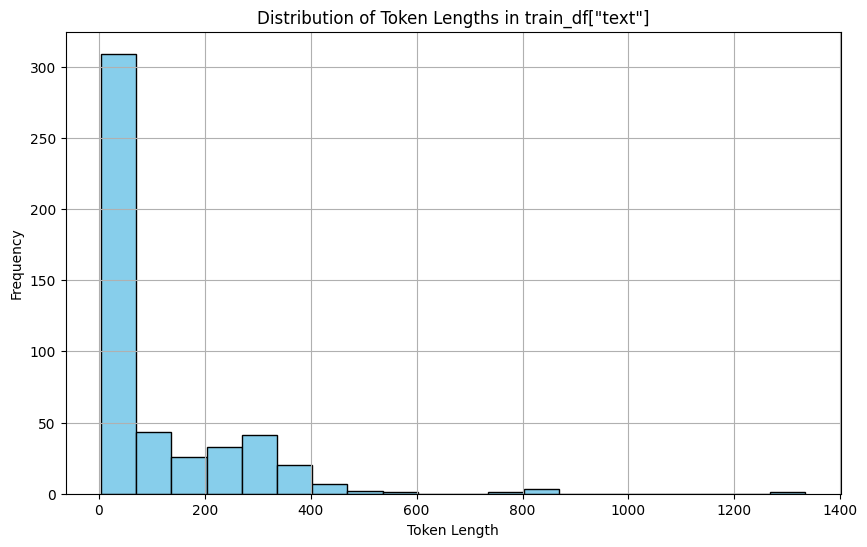

In [23]:
# Compute token lengths for each text
test_df['token_length'] = test_df['text'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=True)))

# Plot histogram of token lengths
plt.figure(figsize=(10,6))
plt.hist(test_df['token_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Token Lengths in train_df["text"]')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [24]:
train_df['label'] = train_df['label'].map({True: 1, False: 0})
eval_df['label'] = eval_df['label'].map({True: 1, False: 0})

/tmp/ipykernel_31/3147424746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['label'] = train_df['label'].map({True: 1, False: 0})
/tmp/ipykernel_31/3147424746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_df['label'] = eval_df['label'].map({True: 1, False: 0})


In [25]:
print(f"Number of labels in train {train_df['label'].value_counts()}")
print(f"Number of labels in eval {eval_df['label'].value_counts()}")

Number of labels in train label
1    51
0    49
Name: count, dtype: int64
Number of labels in eval label
1    13
0     3
Name: count, dtype: int64


In [26]:
# Function to compute metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

## Models

In [27]:
# Function to train a model
def train_model(model_name, train_dataset, eval_dataset, output_dir):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    def tokenize_function(examples):
        return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)
    
    # Tokenize datasets
    tokenized_train = train_dataset.map(tokenize_function, batched=True)
    tokenized_eval = eval_dataset.map(tokenize_function, batched=True)
    
    # Load model
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name, 
        num_labels=2
    )
    
    training_args = TrainingArguments(
    output_dir=output_dir,
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    push_to_hub=False,
    report_to="none",
    )
    
    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train,
        eval_dataset=tokenized_eval,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=4)]
    )
    
    # Train the model
    trainer.train()
    
    # Save model and tokenizer
    trainer.save_model(output_dir)
    tokenizer.save_pretrained(output_dir)
    
    return trainer, tokenizer

In [28]:
# Convert to HF datasets
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)
test_dataset = Dataset.from_pandas(test_df)

In [29]:
# Define models for ensemble
models = [
    ("EMBEDDIA/sloberta", "./EMBEDDIA_sloberta_PL"),
    # ("FacebookAI/xlm-roberta-large", "./xlmroberta_BG"),
    # ("usmiva/bert-web-bg", "./usmiva_bert_web_BG"),
    # ("DeepPavlov/bert-base-bg-cs-pl-ru-cased", "./rmihaylov"),
]

In [30]:
# Train all models
trained_models = []
for model_name, output_dir in models:
    print(f"Training {model_name}...")
    trainer, tokenizer = train_model(model_name, train_dataset, eval_dataset, output_dir)
    trained_models.append((trainer, tokenizer, output_dir))
    print(f"Finished training {model_name}")

Training EMBEDDIA/sloberta...


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/16 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at EMBEDDIA/sloberta and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.293381,1.000000,1.000000,1.000000,1.000000
2,No log,0.271212,0.812500,0.869565,1.000000,0.769231
3,No log,0.100489,1.000000,1.000000,1.000000,1.000000
4,No log,0.066431,1.000000,1.000000,1.000000,1.000000
5,No log,0.068403,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Finished training EMBEDDIA/sloberta


In [31]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

In [32]:
tokenized_eval = eval_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/16 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


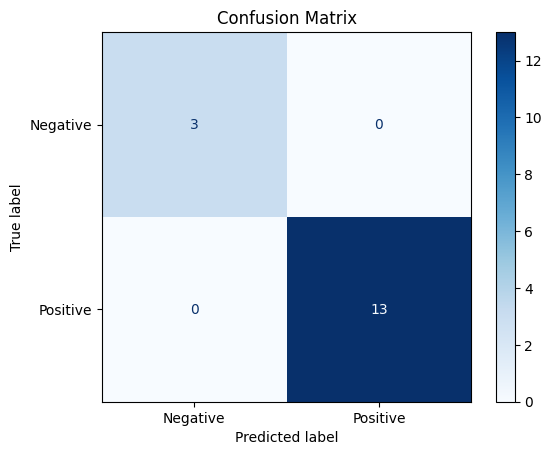

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the evaluation dataset
predictions = trainer.predict(tokenized_eval)

# Extract true and predicted labels
true_labels = predictions.label_ids
predicted_labels = np.argmax(predictions.predictions, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [34]:
_, tokenizer, output_dir = trained_models[0] 

In [35]:
# Load the saved model
model = AutoModelForSequenceClassification.from_pretrained(output_dir)

In [ ]:
model_name = "mahsharyahan/sdadas_robert_PL_St_1"
# tokenizer.push_to_hub(model_name)
trainer.push_to_hub(model_name)

In [36]:
# Define models for ensemble
model_names = [
    "mahsharyahan/EMBEDDIA_sloberta_Sl",
    "mahsharyahan/EMBEDDIA_crosloengual_bert_Sl",
    "mahsharyahan/gerulata_slovakbert_Sl"
]

In [37]:
# Function to get predictions from a model
def get_predictions(model_name, dataset):
    print(f"Getting predictions from {model_name}...")
    
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    model.eval()
    
    # Tokenize the dataset
    def tokenize_function(examples):
        return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)
    
    tokenized_dataset = dataset.map(tokenize_function, batched=True)
    
    # Create a Trainer for prediction
    trainer = Trainer(
        model=model,
        args=TrainingArguments(
            output_dir="./tmp_trainer",
            per_device_eval_batch_size=16,
            report_to="none",
        ),
    )
    
    # Get predictions
    raw_predictions = trainer.predict(tokenized_dataset)
    
    # Convert logits to probabilities
    probabilities = torch.nn.functional.softmax(
        torch.tensor(raw_predictions.predictions), dim=-1
    ).numpy()
    
    return probabilities

In [38]:
# Get predictions from all models for evaluation dataset
eval_predictions = []
for model_name in model_names:
    probabilities = get_predictions(model_name, eval_dataset)
    eval_predictions.append(probabilities)

Getting predictions from mahsharyahan/EMBEDDIA_sloberta_Sl...


tokenizer_config.json:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/800k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.12M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/739 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

Map:   0%|          | 0/16 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Getting predictions from mahsharyahan/EMBEDDIA_crosloengual_bert_Sl...


tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/329k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/652 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/497M [00:00<?, ?B/s]

Map:   0%|          | 0/16 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Getting predictions from mahsharyahan/gerulata_slovakbert_Sl...


tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/875k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/533k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.71M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Map:   0%|          | 0/16 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


In [39]:
# Get predictions from all models for test dataset
test_predictions = []
for model_name in model_names:
    probabilities = get_predictions(model_name, test_dataset)
    test_predictions.append(probabilities)

Getting predictions from mahsharyahan/EMBEDDIA_sloberta_Sl...


Map:   0%|          | 0/487 [00:00<?, ? examples/s]

Getting predictions from mahsharyahan/EMBEDDIA_crosloengual_bert_Sl...


Map:   0%|          | 0/487 [00:00<?, ? examples/s]

Getting predictions from mahsharyahan/gerulata_slovakbert_Sl...


Map:   0%|          | 0/487 [00:00<?, ? examples/s]

In [40]:
# Try different weight combinations to find the best F1 score on eval set
best_f1 = 0
best_weights = [0.35, 0.35, 0.3]  # Default equal weights

weight_options = [
    [0.4, 0.1, 0.5],
    [0.5, 0.25, 0.25],
    [0.33, 0.33, 0.34],
    [0.6, 0.2, 0.2],
    [0.2, 0.4, 0.4],
    [0.2, 0.6, 0.2]
]

print("Finding optimal weights based on evaluation set performance...")
for weights in weight_options:
    # Ensemble predictions with current weights
    ensemble_probs = np.zeros_like(eval_predictions[0])
    for i, pred in enumerate(eval_predictions):
        ensemble_probs += weights[i] * pred
    
    # Calculate metrics
    predictions = np.argmax(ensemble_probs, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(
        eval_df['label'], 
        predictions, 
        average='binary'
    )
    
    print(f"Weights {weights}: F1 = {f1:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_weights = weights

print(f"\nBest weights found: {best_weights} with F1: {best_f1:.4f}")

Finding optimal weights based on evaluation set performance...
Weights [0.4, 0.1, 0.5]: F1 = 0.9600, Precision = 1.0000, Recall = 0.9231
Weights [0.5, 0.25, 0.25]: F1 = 0.9600, Precision = 1.0000, Recall = 0.9231
Weights [0.33, 0.33, 0.34]: F1 = 0.9600, Precision = 1.0000, Recall = 0.9231
Weights [0.6, 0.2, 0.2]: F1 = 0.9600, Precision = 1.0000, Recall = 0.9231
Weights [0.2, 0.4, 0.4]: F1 = 0.9600, Precision = 1.0000, Recall = 0.9231
Weights [0.2, 0.6, 0.2]: F1 = 0.9600, Precision = 1.0000, Recall = 0.9231

Best weights found: [0.4, 0.1, 0.5] with F1: 0.9600


In [41]:
# Use best weights for final ensemble on evaluation set
eval_ensemble_probs = np.zeros_like(eval_predictions[0])
for i, pred in enumerate(eval_predictions):
    eval_ensemble_probs += best_weights[i] * pred

eval_predictions_final = np.argmax(eval_ensemble_probs, axis=1)
eval_precision, eval_recall, eval_f1, _ = precision_recall_fscore_support(
    eval_df['label'], 
    eval_predictions_final, 
    average='binary'
)
eval_accuracy = accuracy_score(eval_df['label'], eval_predictions_final)

print("\nFinal Evaluation Set Results:")
print(f"F1 Score: {eval_f1:.4f}")
print(f"Precision: {eval_precision:.4f}")
print(f"Recall: {eval_recall:.4f}")
print(f"Accuracy: {eval_accuracy:.4f}")


Final Evaluation Set Results:
F1 Score: 0.9600
Precision: 1.0000
Recall: 0.9231
Accuracy: 0.9375


In [42]:
# Use best weights for test set predictions
test_ensemble_probs = np.zeros_like(test_predictions[0])
for i, pred in enumerate(test_predictions):
    test_ensemble_probs += best_weights[i] * pred

test_predictions_final = np.argmax(test_ensemble_probs, axis=1)

# Create submission dataframe
submission_df = test_df.copy()
submission_df['prediction'] = test_predictions_final

# Calculate test metrics if labels are available
if 'label' in submission_df.columns:
    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(
        submission_df['label'], 
        submission_df['prediction'], 
        average='binary'
    )
    test_accuracy = accuracy_score(submission_df['label'], submission_df['prediction'])
    
    print("\nTest Set Results:")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"Accuracy: {test_accuracy:.4f}")

In [43]:
submission_df.head()

,file_name,start,end,text,token_length,prediction
0,SI_ParlaMint-SI_2021-10-18-SDZ8-Redna-26_7.txt,2,401,"Stečaj TEŠ. Poglejte, če bi prišlo do stečaja ...",79,1
1,SI_ParlaMint-SI_2021-10-18-SDZ8-Redna-26_7.txt,404,608,Glede ciljev iz obnovljivih virov energije. Dr...,49,1
2,SI_ParlaMint-SI_2021-10-18-SDZ8-Redna-26_7.txt,611,622,Hvala lepa.,5,0
3,SI_ParlaMint-SI_2021-10-18-SDZ8-Redna-26_7.txt,625,683,"Mag. Rajh, imate besedo za zahtevo za dopolnit...",15,0
4,SI_ParlaMint-SI_2021-10-18-SDZ8-Redna-26_7.txt,686,794,"Spoštovani minister, veliko vprašanj sem posta...",21,0


In [44]:
submission_df = submission_df.drop(['text','token_length'], axis=1)

In [45]:
submission_df = submission_df.rename(columns={
    'file_name': 'documentID',
    'prediction': 'persuasion_flag'
})

In [46]:
submission_df

,documentID,start,end,persuasion_flag
0,SI_ParlaMint-SI_2021-10-18-SDZ8-Redna-26_7.txt,2,401,1
1,SI_ParlaMint-SI_2021-10-18-SDZ8-Redna-26_7.txt,404,608,1
2,SI_ParlaMint-SI_2021-10-18-SDZ8-Redna-26_7.txt,611,622,0
3,SI_ParlaMint-SI_2021-10-18-SDZ8-Redna-26_7.txt,625,683,0
4,SI_ParlaMint-SI_2021-10-18-SDZ8-Redna-26_7.txt,686,794,0
...,...,...,...,...
482,SI_ParlaMint-SI_2021-10-21-SDZ8-Redna-26_7.txt,5330,5745,1
483,SI_ParlaMint-SI_2021-10-21-SDZ8-Redna-26_7.txt,5748,5759,0
484,SI_ParlaMint-SI_2021-10-21-SDZ8-Redna-26_7.txt,5762,5838,0
485,SI_ParlaMint-SI_2021-10-21-SDZ8-Redna-26_7.txt,5841,5850,0


In [47]:
# Save predictions
submission_df.to_csv('subtask1_SI_1.csv', index=False)
# print("\nPredictions saved to 'ensemble_predictions.csv'")

In [48]:
from IPython.display import FileLink

FileLink("subtask1_SI_1.csv")

/kaggle/working/subtask1_SI_1.csv